In [10]:
import numpy as np
from sklearn import datasets
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score

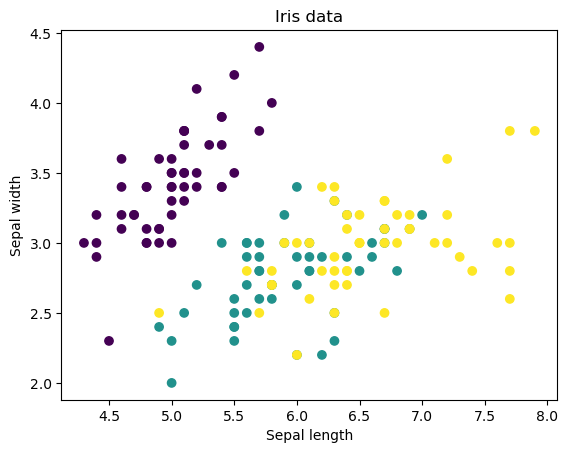

In [14]:
iris = datasets.load_iris()
X, y = iris.data, iris.target

# Plot the data
plt.figure()
plt.scatter(X[:, 0], X[:, 1], c=y)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.title('Iris data')
plt.show()

# K-Means Clustering

## 1. What problem is the model used to solve?
K-Means clustering is used to solve the problem of unsupervised learning, specifically clustering. It aims to partition a set of $n$ observations into $k$ clusters in which each observation belongs to the cluster with the nearest mean, serving as a prototype of the cluster.

## 2. What assumption does the model make?
The model assumes that:
- The number of clusters $k$ is known a priori.
- The clusters are spherical and equally sized.
- The data points are closer to the cluster center they belong to than to any other cluster center.

## 3. What is the model?
The K-Means model represents each cluster by the mean (centroid) of the data points in the cluster. The objective is to minimize the within-cluster sum of squares (WCSS), also known as inertia. Mathematically, the objective function is:

$$
\text{arg min}_C \sum_{i=1}^{k} \sum_{x \in C_i} \| x - \mu_i \|^2
$$

where:
- $C_i$ is the set of points in cluster $i$
- $\mu_i$ is the centroid of cluster $i$
- $\| x - \mu_i \|^2$ is the squared Euclidean distance between a point $x$ and the centroid $\mu_i$

## 4. How is the model trained?
The K-Means algorithm follows these steps:
1. **Initialization**: Randomly select $k$ initial centroids.
2. **Assignment**: Assign each data point to the nearest centroid.
3. **Update**: Recalculate the centroids as the mean of all points assigned to each centroid.
4. **Repeat**: Repeat the assignment and update steps until convergence (i.e., the centroids no longer change significantly).

## 5. How is the model evaluated?
The model is evaluated using metrics such as:
- **Inertia (WCSS)**: Measures the sum of squared distances between data points and their respective cluster centroids. Lower inertia indicates better clustering.
- **Silhouette Score**: Measures how similar a data point is to its own cluster compared to other clusters. It ranges from -1 to 1, with higher values indicating better-defined clusters.

$$
s(i) = \frac{b(i) - a(i)}{\max(a(i), b(i))}
$$

where:
- $a(i)$ is the average distance between the point $i$ and all other points in the same cluster.
- $b(i)$ is the minimum average distance between the point $i$ and all points in the nearest cluster.

Silhouette Score: 0.5511916046195919


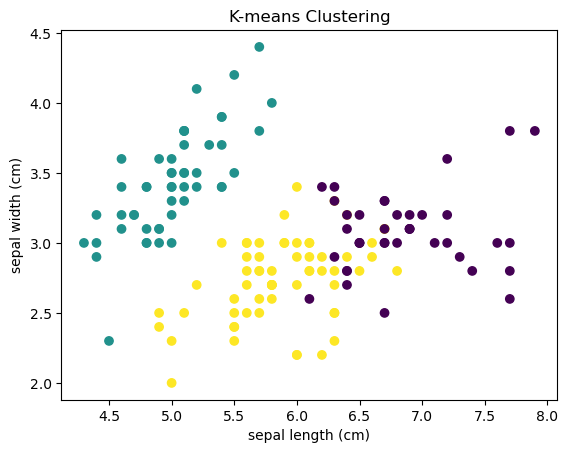

In [11]:
from sklearn.cluster import KMeans

# Number of clusters
n_clusters = 3

# Create a KMeans instance with the desired number of clusters
kmeans = KMeans(n_clusters=n_clusters, random_state=42)

# Fit the model to the data
kmeans.fit(X)

# Get the cluster labels
labels = kmeans.labels_

# Evaluate the clustering
silhouette = silhouette_score(X, labels)
print(f'Silhouette Score: {silhouette}')

# Plot the clusters
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis')
plt.xlabel(iris.feature_names[0])
plt.ylabel(iris.feature_names[1])
plt.title('K-means Clustering')
plt.show()

# Gaussian Mixture Model

## 1. What problem is the model used to solve?
The Gaussian Mixture Model (GMM) is used to solve the problem of unsupervised learning, specifically clustering. It aims to model the data as a mixture of several Gaussian distributions, each representing a different cluster.

## 2. What assumption does the model make?
The model assumes that:
- The data is generated from a mixture of several Gaussian distributions.
- Each Gaussian distribution has its own mean and covariance.
- The number of Gaussian components (clusters) is known a priori.

## 3. What is the model?
The GMM represents each cluster by a Gaussian distribution. The model is defined by the parameters of these Gaussian distributions, which include the mean vector $\mu_k$, the covariance matrix $\Sigma_k$, and the mixing coefficient $\pi_k$ for each component $k$. The probability density function of the GMM is given by:

$$
p(x) = \sum_{k=1}^{K} \pi_k \mathcal{N}(x | \mu_k, \Sigma_k)
$$

where:
- $K$ is the number of Gaussian components.
- $\mathcal{N}(x | \mu_k, \Sigma_k)$ is the Gaussian distribution with mean $\mu_k$ and covariance $\Sigma_k$.

## 4. How is the model trained?
The GMM is typically trained using the Expectation-Maximization (EM) algorithm, which iteratively updates the parameters to maximize the likelihood of the data. The steps are:
1. **Initialization**: Initialize the parameters $\mu_k$, $\Sigma_k$, and $\pi_k$.
2. **Expectation (E-step)**: Calculate the posterior probabilities (responsibilities) for each data point belonging to each Gaussian component.
3. **Maximization (M-step)**: Update the parameters $\mu_k$, $\Sigma_k$, and $\pi_k$ using the responsibilities calculated in the E-step.
4. **Repeat**: Repeat the E-step and M-step until convergence (i.e., the parameters no longer change significantly).

## 5. How is the model evaluated?
The model is evaluated using metrics such as:
- **Log-Likelihood**: Measures the probability of the data given the model parameters. Higher log-likelihood indicates a better fit.
- **Silhouette Score**: Measures how similar a data point is to its own cluster compared to other clusters. It ranges from -1 to 1, with higher values indicating better-defined clusters.

$$
s(i) = \frac{b(i) - a(i)}{\max(a(i), b(i))}
$$

where:
- $a(i)$ is the average distance between the point $i$ and all other points in the same cluster.
- $b(i)$ is the minimum average distance between the point $i$ and all points in the nearest cluster.

Silhouette Score: 0.5011761635067206


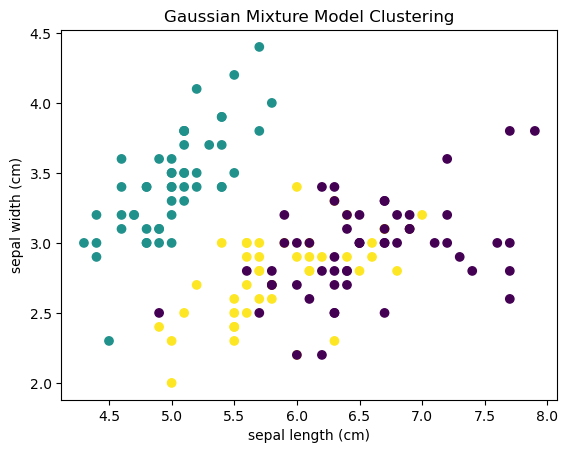

In [13]:
from sklearn.mixture import GaussianMixture

# Number of components (clusters)
n_components = 3

# Create a GaussianMixture instance with the desired number of components
gmm = GaussianMixture(n_components=n_components, random_state=42)

# Fit the model to the data
gmm.fit(X)

# Get the cluster labels
gmm_labels = gmm.predict(X)

# Evaluate the clustering
silhouette = silhouette_score(X, gmm_labels)
print(f'Silhouette Score: {silhouette}')

# Plot the clusters
plt.scatter(X[:, 0], X[:, 1], c=gmm_labels, cmap='viridis')
plt.xlabel(iris.feature_names[0])
plt.ylabel(iris.feature_names[1])
plt.title('Gaussian Mixture Model Clustering')
plt.show()